# Juntando R y Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Adicionar este bloque
#set R_HOME dynamically
import os
os.environ['R_HOME'] = r'C:\Program Files\R\R-3.6.3' # Ruta de R. Esto cambia segun el PC
#set R bin
os.environ['path'] += r';C:\Program Files\R\R-3.6.3\bin\x64;' # Ruta de R adicionando \bin\x64. Esto cambia segun el PC

In [4]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [5]:
rpy2.robjects.numpy2ri.activate()

In [6]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [7]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:

In [8]:
saludar_py = ro.globalenv["saludar"]

In [9]:
res = saludar_py("Antonio Banderas")
res[0]

'Hola,  Antonio Banderas'

In [10]:
type(res)

rpy2.robjects.vectors.StrVector

In [11]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [12]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [13]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [14]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [15]:
ro.globalenv["var_to_r"] = var_from_python

In [16]:
ro.r("var_to_r")

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [17]:
ro.r("sum(var_to_r)")

118.000000


In [18]:
ro.r("mean(var_to_r)")

2.950000


In [19]:
ro.r("sd(var_to_r)")

1.169045


In [20]:
np.sum(var_from_python)

118.00000000000007

In [21]:
np.mean(var_from_python)

2.950000000000002

In [22]:
ro.r("summary(var_to_r)")

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


In [23]:
ro.r("hist(var_to_r, breaks = 4)")

breaks,[RTYPES.INTSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


# Trabajar de forma conjunta entre R y Python

In [24]:
from rpy2.robjects.packages import importr

In [25]:
ro.r("install.packages('extRemes')")# si os falla decidle 'n' al hacer la instalación

<rpy2.rinterface_lib.sexp.NULLType object at 0x00000148C4205F00> [RTYPES.NILSXP]

In [26]:
extremes = importr("extRemes") # library(extRemes)

In [27]:
fevd = extremes.fevd

In [28]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x00000148C7524CC0> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data to whic

In [29]:
#data = pd.read_csv("../datasets/time/time_series.txt", # Anterior
#                   sep = "/s*", skiprows = 1, parse_dates = [[0,1]],
#                   names = ["date", "time", "wind_speed"],
#                   index_col = 0)

data = pd.read_csv("../datasets/time/time_series.txt",
                   sep = '\s+',skiprows = 1,parse_dates = [[0,1]],
                   names = ["date", "time", "wind_speed"],
                   index_col = 0)

In [30]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [31]:
data.shape

(275352, 1)

In [32]:
#max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq="A")).max() # Anterior
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [33]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

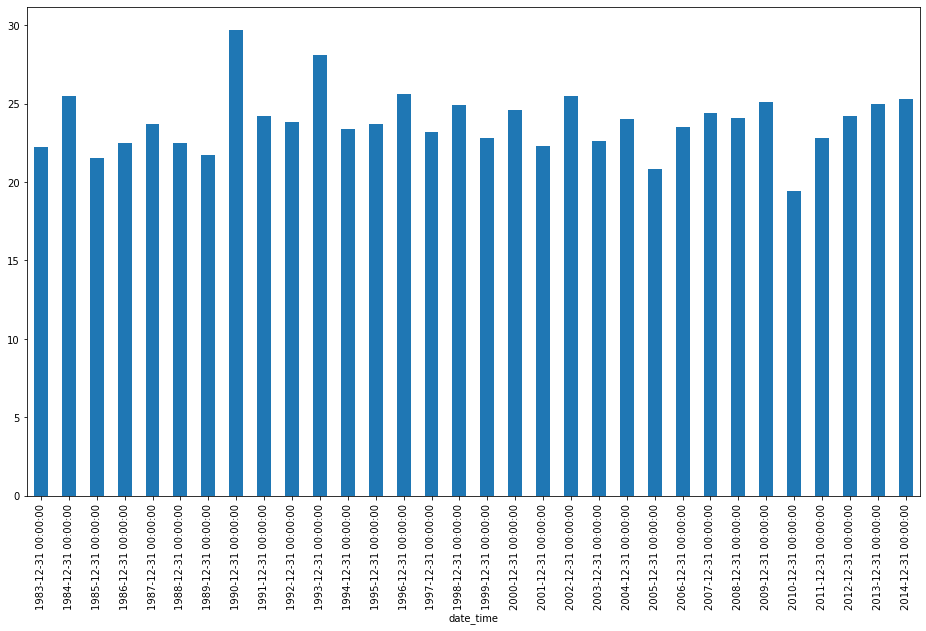

In [34]:
max_ws.plot(kind="bar", figsize=(16,9))

In [35]:
result = fevd(max_ws.values, type="GEV", method = "GMLE")

In [36]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [37]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
[LangSexpV..., StrSexpVe..., FloatSexp..., BoolSexpV..., ..., StrSexpVe..., StrSexpVe..., ListSexpV..., ListSexpV...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  )
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.BoolArray'>
  R object with classes: ('array',) mapped to:
[       0,        0,        0,        0, ...,        0,        0,        0,        0]
...
  x: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
['na.fail']
  priorFun: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: 

In [38]:
#print(result.names)
result.names

'call','data.name','weights',...,'parnames','results','initial....


In [39]:
res = result.rx("results")

In [40]:
#print(res[0])
res[0]

par,[RTYPES.REALSXP]
value,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
convergence,[RTYPES.INTSXP]
message,[RTYPES.NILSXP]
hessian,[RTYPES.REALSXP]
num.pars,[RTYPES.VECSXP]


In [41]:
loc, scale, shape = res[0].rx("par")[0]

In [42]:
loc

23.063941519915588

In [43]:
scale

1.7576912874286317

In [44]:
shape

-0.1628816367714792

# Función mágica para R

In [45]:
%load_ext rpy2.ipython

C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:365: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [46]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER] [-d DISPLAY]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R R

In [47]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [48]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)

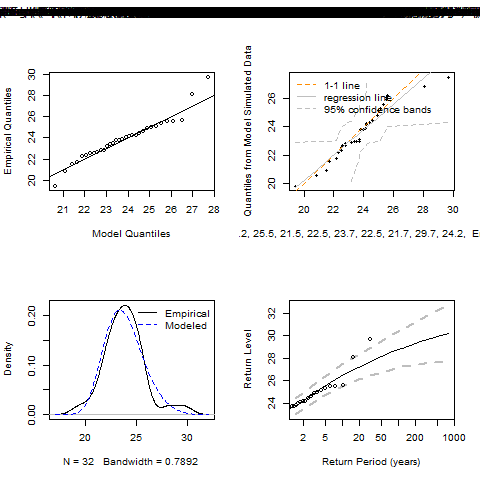

In [49]:
%R -i result plot.fevd(result)

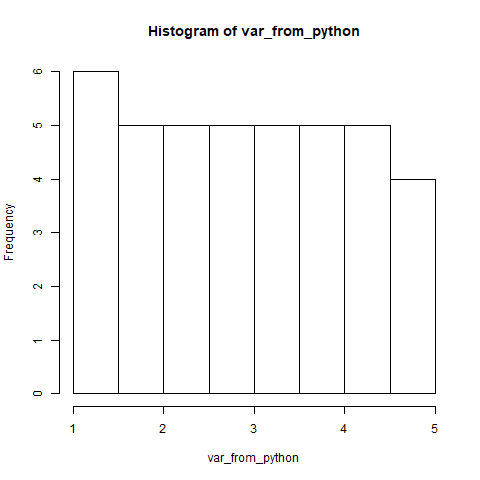

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [50]:
%R -i var_from_python hist(var_from_python)

In [51]:
ro.globalenv["result"] = result
ro.r("plot.fevd(result)") ## puede dar error y generar un objeto rpy2.rinterface.NULL

<rpy2.rinterface_lib.sexp.NULLType object at 0x00000148C4205F00> [RTYPES.NILSXP]

# Un ejemplo complejo de R, Python y Rmagic

In [52]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipos = ["GEV", "Gumbel"]

Tipo de Ajuste:  GEV
Método del Ajuste:  MLE



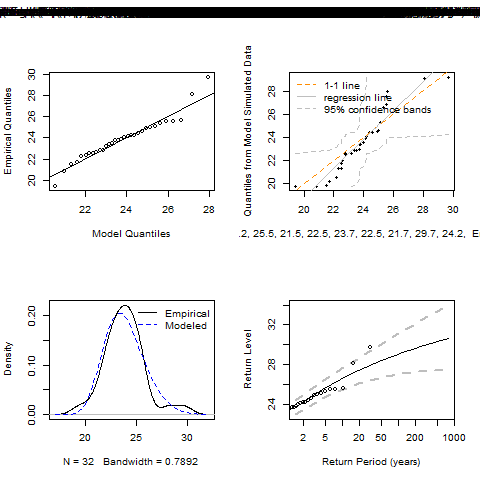

Tipo de Ajuste:  GEV
Método del Ajuste:  GMLE



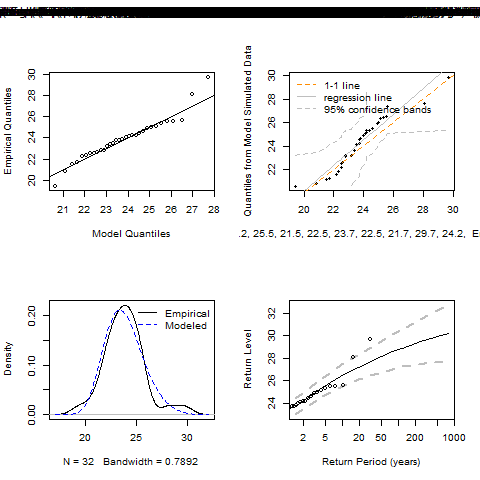

Tipo de Ajuste:  GEV
Método del Ajuste:  Bayesian



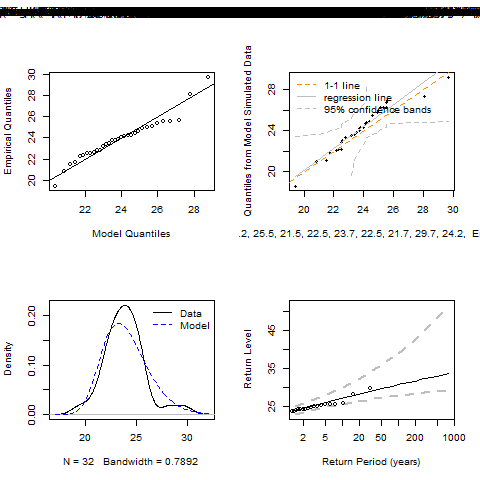

Tipo de Ajuste:  GEV
Método del Ajuste:  Lmoments



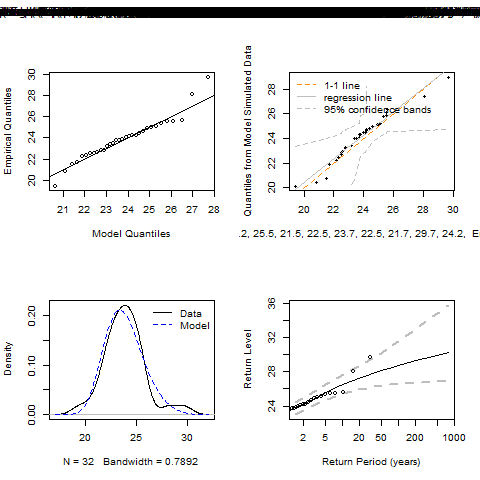

Tipo de Ajuste:  Gumbel
Método del Ajuste:  MLE



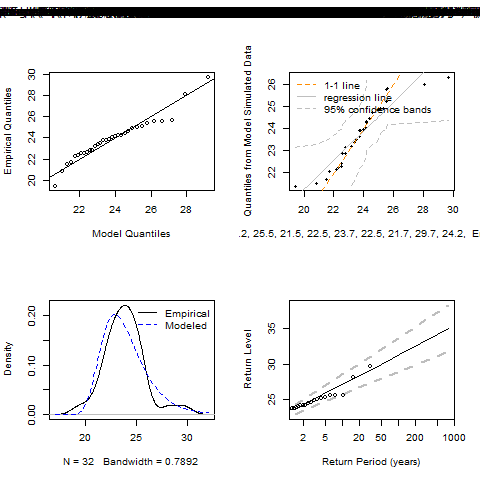

Tipo de Ajuste:  Gumbel
Método del Ajuste:  GMLE



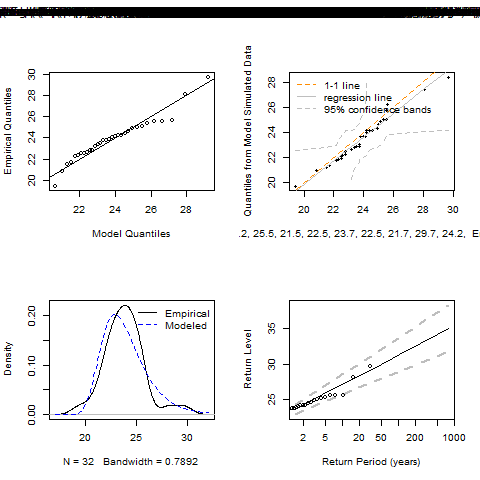

Tipo de Ajuste:  Gumbel
Método del Ajuste:  Bayesian


RRuntimeError: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  number of items to replace is not a multiple of replacement length


In [53]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Método del Ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)